In [1]:
#load labels
import os
import json
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
import torch

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

#enable gpu
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)


C:\Users\viers\AppData\Roaming\Python\Python38\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

""" faces = []
imagePaths = []

labelsPath = "data\\labels\\"
labels = os.listdir(labelsPath)

for label in labels:
    with open(labelsPath + label) as f:
        if label.endswith(".vott"):
            continue
        data = json.load(f)
        imagePaths.append(data['asset']['path'].split(":")[-1])
        boundingBoxes = ""
        #check if data has multiple faces
        
        for i in range(len(data['regions'])):            
            if boundingBoxes == "":
                boundingBoxes = [data['regions'][i]['boundingBox']]
            else:
                boundingBoxes.append(data['regions'][i]['boundingBox'])
        #boundingBox = data['regions'][0]['boundingBox']
        faces.append(boundingBoxes)

print(len(faces))
print(len(imagePaths)) """

' faces = []\nimagePaths = []\n\nlabelsPath = "data\\labels\\"\nlabels = os.listdir(labelsPath)\n\nfor label in labels:\n    with open(labelsPath + label) as f:\n        if label.endswith(".vott"):\n            continue\n        data = json.load(f)\n        imagePaths.append(data[\'asset\'][\'path\'].split(":")[-1])\n        boundingBoxes = ""\n        #check if data has multiple faces\n        \n        for i in range(len(data[\'regions\'])):            \n            if boundingBoxes == "":\n                boundingBoxes = [data[\'regions\'][i][\'boundingBox\']]\n            else:\n                boundingBoxes.append(data[\'regions\'][i][\'boundingBox\'])\n        #boundingBox = data[\'regions\'][0][\'boundingBox\']\n        faces.append(boundingBoxes)\n\nprint(len(faces))\nprint(len(imagePaths)) '

In [3]:
""" datapath = "data\\dogFaces\\"
data = os.listdir(datapath)

for i in data:
    if "pixabay" in i or "flickr" in i:
        imagePaths.append(datapath + i)
        imageSize = cv2.imread(datapath + i).shape
        faces.append((0, 0, imageSize[1], imageSize[0]))

print(len(faces))
print(len(imagePaths)) """
     

' datapath = "data\\dogFaces\\"\ndata = os.listdir(datapath)\n\nfor i in data:\n    if "pixabay" in i or "flickr" in i:\n        imagePaths.append(datapath + i)\n        imageSize = cv2.imread(datapath + i).shape\n        faces.append((0, 0, imageSize[1], imageSize[0]))\n\nprint(len(faces))\nprint(len(imagePaths)) '

In [4]:
%cd FaceDetectionYolo
faces = []
imagePaths = []


PathAnimalFaces = "data\\dogFacesFull\\AnimalFacesDataset\\Labels\\"
LabelsAnimalFaces = os.listdir(PathAnimalFaces)

for label in LabelsAnimalFaces:
    with open(PathAnimalFaces + label) as f:
        if label.endswith(".vott"):
            continue
        data = json.load(f)
        imagePaths.append(data['asset']['path'].split(":")[-1])
        boundingBoxes = ""
        #check if data has multiple faces
        
        for i in range(len(data['regions'])):            
            if boundingBoxes == "":
                boundingBoxes = [data['regions'][i]['boundingBox']]
            else:
                boundingBoxes.append(data['regions'][i]['boundingBox'])
        faces.append(boundingBoxes)

lenDataset = len(faces)
print(f"faces in AnimalFacesDataset: {lenDataset}")

PathOwnPictures = "data\\dogFacesFull\\OwnPictures\\Labels\\"
LabelsOwnPictures = os.listdir(PathOwnPictures)

for label in LabelsOwnPictures:
    with open(PathOwnPictures + label) as f:
        if label.endswith(".vott"):
            continue
        data = json.load(f)
        imagePaths.append(data['asset']['path'].split(":")[-1])
        boundingBoxes = ""
        #check if data has multiple faces
        
        for i in range(len(data['regions'])):            
            if boundingBoxes == "":
                boundingBoxes = [data['regions'][i]['boundingBox']]
            else:
                boundingBoxes.append(data['regions'][i]['boundingBox'])
        faces.append(boundingBoxes)

lenOwnPictures = len(faces) - lenDataset
print(f"faces in OwnPictures: {lenOwnPictures}")

PathDogVsCats = "data\\dogFacesFull\\DogVsCatsDataset\\Labels\\"
LabelsDogVsCats = os.listdir(PathDogVsCats)

for label in LabelsDogVsCats:
    with open(PathDogVsCats + label) as f:
        if label.endswith(".vott"):
            continue
        data = json.load(f)
        imagePaths.append(data['asset']['path'].split(":")[-1])
        boundingBoxes = ""
        #check if data has multiple faces
        
        for i in range(len(data['regions'])):            
            if boundingBoxes == "":
                boundingBoxes = [data['regions'][i]['boundingBox']]
            else:
                boundingBoxes.append(data['regions'][i]['boundingBox'])
        faces.append(boundingBoxes)

lenDogVsCats = len(faces) - lenDataset - lenOwnPictures
print(f"faces in DogVsCats: {lenDogVsCats}")

print(f"faces in total: {len(faces)}")





[WinError 2] The system cannot find the file specified: 'FaceDetectionYolo'
c:\Users\viers\OneDrive\Bureaublad\ResearchProject\researchproject\FaceDetectionYolo
faces in AnimalFacesDataset: 500
faces in OwnPictures: 51
faces in DogVsCats: 124
faces in total: 675


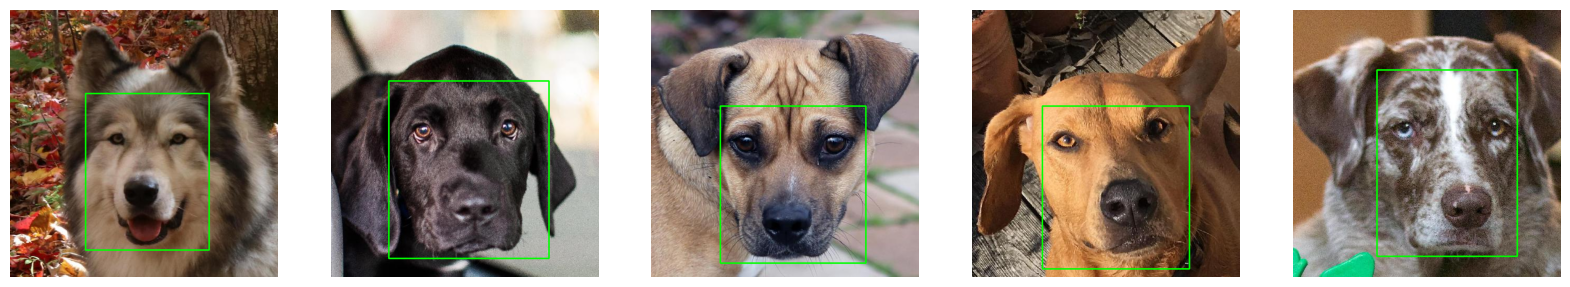

In [5]:
fig, ax = plt.subplots(1,5, figsize=(20,20))
for i in range(5):
    image = cv2.imread(imagePaths[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    for j in range(len(faces[i])):
        coordinates = (faces[i][j]['left'], faces[i][j]['top'], faces[i][j]['width'], faces[i][j]['height'])
        x,y,w,h = coordinates
        topleft = (int(x),int(y))
        bottomright = (int(x)+int(w), int(y)+int(h))
        cv2.rectangle(image, (topleft), (bottomright), (0,255,0), 2) 
    ax[i].imshow(image)
    ax[i].axis("off")
plt.show()


/Users/viers/OneDrive/Bureaublad/ResearchProject/researchproject/FaceDetectionYolo/data/dogFacesFull/AnimalFacesDataset/Images/flickr_dog_000152.jpg
/Users/viers/OneDrive/Bureaublad/ResearchProject/researchproject/FaceDetectionYolo/data/dogFacesFull/AnimalFacesDataset/Images/flickr_dog_000416.jpg
/Users/viers/OneDrive/Bureaublad/ResearchProject/researchproject/FaceDetectionYolo/data/dogFacesFull/AnimalFacesDataset/Images/flickr_dog_000176.jpg
/Users/viers/OneDrive/Bureaublad/ResearchProject/researchproject/FaceDetectionYolo/data/dogFacesFull/AnimalFacesDataset/Images/flickr_dog_000182.jpg
/Users/viers/OneDrive/Bureaublad/ResearchProject/researchproject/FaceDetectionYolo/data/dogFacesFull/AnimalFacesDataset/Images/flickr_dog_000165.jpg
/Users/viers/OneDrive/Bureaublad/ResearchProject/researchproject/FaceDetectionYolo/data/dogFacesFull/AnimalFacesDataset/Images/flickr_dog_000392.jpg
/Users/viers/OneDrive/Bureaublad/ResearchProject/researchproject/FaceDetectionYolo/data/dogFacesFull/Anima

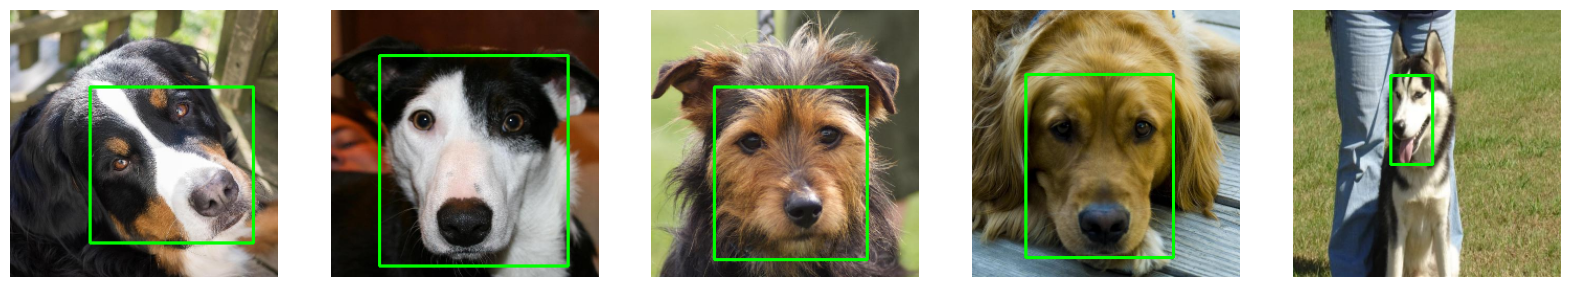

In [6]:
#resize images and bounding boxes
imageSize = 256
resizedImages = []
resizedFaces = []


for i in range(len(imagePaths)):
    print(imagePaths[i])
    image = cv2.imread(imagePaths[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    originalSize = image.shape
    image = cv2.resize(image, (imageSize,imageSize))
    resizedFace = ""
    for j in range(len(faces[i])):
        coordinates = (faces[i][j]['left'], faces[i][j]['top'], faces[i][j]['width'], faces[i][j]['height'])
        x,y,w,h = coordinates
        x = x * (imageSize/originalSize[1])
        y = y * (imageSize/originalSize[0])
        w = w * (imageSize/originalSize[1])
        h = h * (imageSize/originalSize[0])
        if resizedFace == "":
            resizedFace = [{'left':x, 'top':y, 'width':w, 'height':h}]
        else:
            resizedFace.append({'left':x, 'top':y, 'width':w, 'height':h})
    resizedFaces.append(resizedFace)
    resizedImages.append(image)
    
    


fig, ax = plt.subplots(1,5, figsize=(20,20))
for i in range(5):
    #get random faces
    x = random.randint(0, len(resizedImages)-1)
    image = resizedImages[x]
    for j in range(len(resizedFaces[x])):
        coordinates = (resizedFaces[x][j]['left'], resizedFaces[x][j]['top'], resizedFaces[x][j]['width'], resizedFaces[x][j]['height'])
        x,y,w,h = coordinates
        topleft = (int(x),int(y))
        bottomright = (int(x)+int(w), int(y)+int(h))
        cv2.rectangle(image, (topleft), (bottomright), (0,255,0), 2) 
    ax[i].imshow(image)
    ax[i].axis("off")
plt.show()


In [7]:
#moving data to folder for yolov7

targetTrainPath = "yolov7\\data\\train\\images\\"
targetTrainLabelPath = "yolov7\\data\\train\\labels\\"
targetValPath = "yolov7\\data\\val\\images\\"
targetValLabelPath = "yolov7\\data\\val\\labels\\"

#if directory does not exist, create it
if not os.path.exists(targetTrainPath):
    os.makedirs(targetTrainPath)
if not os.path.exists(targetTrainLabelPath):
    os.makedirs(targetTrainLabelPath)
if not os.path.exists(targetValPath):
    os.makedirs(targetValPath)
if not os.path.exists(targetValLabelPath):
    os.makedirs(targetValLabelPath)

#split data into train and validation
X_train, X_val, y_train, y_val = train_test_split(resizedImages, resizedFaces, test_size=0.2, random_state=42)


#yolo bounding box takes (x_center, y_center, width, height) as input
def convertToYolo(coordinates):
    x,y,w,h = coordinates
    x_center = x + (w/2)
    y_center = y + (h/2)
    return (x_center, y_center, w, h)

def normalizeForYolo(coordinates):
    x,y,w,h = coordinates
    x_center = x / imageSize
    y_center = y / imageSize
    w = w / imageSize
    h = h / imageSize
    return (x_center, y_center, w, h)

for i in range( len(X_train) ):
    #cv2.imwrite(targetTrainPath + str(i) + ".jpg", X_train[i]) 
    cv2.imwrite(targetTrainPath + str(i) + ".jpg", cv2.cvtColor(X_train[i], cv2.COLOR_BGR2RGB))
    with open(targetTrainLabelPath + str(i) + ".txt", "w") as f:
        for j in range(len(y_train[i])):
            coordinates = (y_train[i][j]['left'], y_train[i][j]['top'], y_train[i][j]['width'], y_train[i][j]['height'])
            x_center, y_center, w, h = normalizeForYolo(convertToYolo(coordinates))
            f.write("0 " + str(x_center) + " " + str(y_center) + " " + str(w) + " " + str(h) + "\n")

for i in range( len(X_val) ):
    #cv2.imwrite(targetValPath + str(i) + ".jpg", X_val[i])
    cv2.imwrite(targetValPath + str(i) + ".jpg", cv2.cvtColor(X_train[i], cv2.COLOR_BGR2RGB))

    with open(targetValLabelPath + str(i) + ".txt", "w") as f:
        for j in range(len(y_val[i])):
            coordinates = (y_val[i][j]['left'], y_val[i][j]['top'], y_val[i][j]['width'], y_val[i][j]['height'])
            x_center, y_center, w, h = normalizeForYolo(convertToYolo(coordinates))
            f.write("0 " + str(x_center) + " " + str(y_center) + " " + str(w) + " " + str(h) + "\n")




In [8]:
#train yolov7 on data

#print path atm
%cd yolov7
torch.cuda.empty_cache()

#train model
!python train.py --workers 1 --device 0 --batch-size 8 --epochs 500  --img 256 256 --hyp data/hyp.scratch.custom.yaml --name yolov7-custom2 --weights yolov7.pt

c:\Users\viers\OneDrive\Bureaublad\ResearchProject\researchproject\FaceDetectionYolo\yolov7
^C
